In [80]:
# ===== Programming exercise ======
# =================================

# The lorentz model is given as follow:
\begin{equation}
\left\{
\begin{split}
x'(t) & = \sigma(y-x)\\
y'(t) & = rx - y - xz \\
z'(t) & = xy - bz
\end{split}
\right.
\end{equation}
Let us implement the model using coding

In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import matplotlib as cm

In [78]:
def F(m,m1,t):
    [x,y,z] = m1
    dxdt = m[0]*(y-x)
    dydt = m[1]*x - y - x*z
    dzdt = x*y - m[2]*z
    return np.array([dxdt,dydt,dzdt])

In [77]:
def RK4(F,x0,t):
    h=t[1] - t[0]
    m1=np.zeros([len(t),len(x0)])
    m1[0] = x0
    for i in range(len(t)-1):
        k1 = F(m,m1[i],t[i])
        k2 = F(m, m1[i]+h*(k1/2),t[i]+(h/2))
        k3 = F(m, m1[i]+h*(k2/2),t[i]+(h/2))
        k4 = F(m, m1[i]+h*k3,t[i]+h)
        m1[i+1] = m1[i] + (h/6)*(k1+2*k2+2*k3+k4)
    return m1

In [76]:
sigma =10
r=28
b=8/3
x0 = [8,0,30]
t = np.linspace(-20,20,1000)
m = [sigma,r,b] 
Result = RK4(F,x0,t)
Result

array([[ 8.        ,  0.        , 30.        ],
       [ 5.31263079, -0.13726712, 26.92803343],
       [ 3.57961011,  0.2760398 , 24.20684875],
       ...,
       [-3.1771216 ,  0.91678253, 27.35220855],
       [-1.86222268,  0.68924193, 24.50532831],
       [-1.07210399,  0.40095795, 21.99366711]])

In [75]:
z = Result[:,2]
x = Result[:,0]
y = Result[:,1]

Text(0.5, 0, 'z')

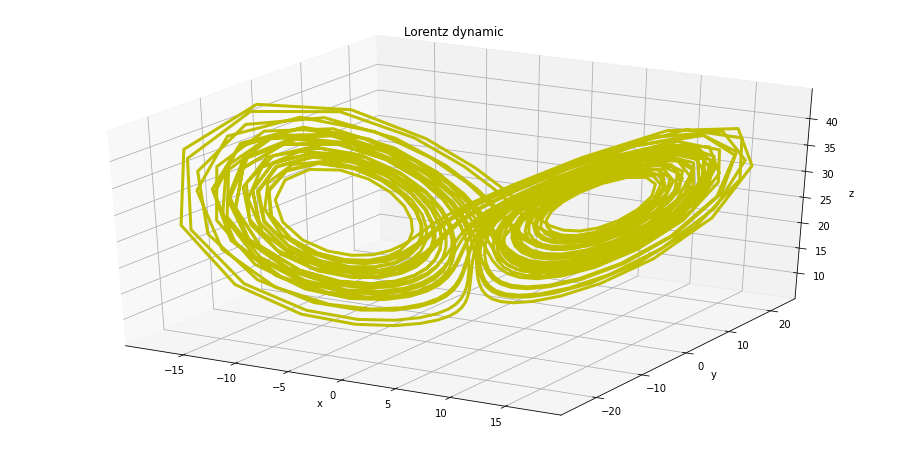

In [91]:
fig = plt.figure(figsize = (16,8))
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, 'y', linewidth = 3)
ax.set_title('Lorentz dynamic')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#  Plotting in two dimension

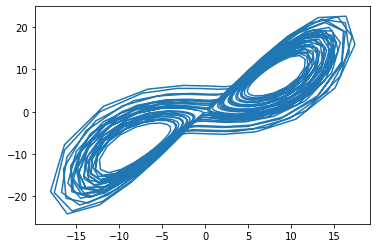

In [88]:
plt.plot(x, y) 

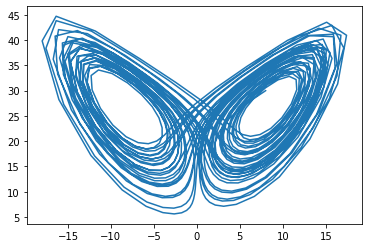

In [89]:
plt.plot(x, z)

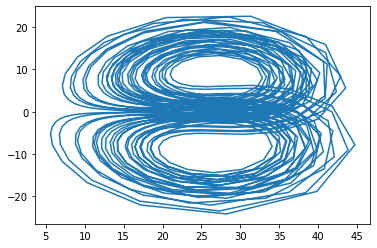

In [90]:
plt.plot(z, y)